Saving th.jpg to th (1).jpg


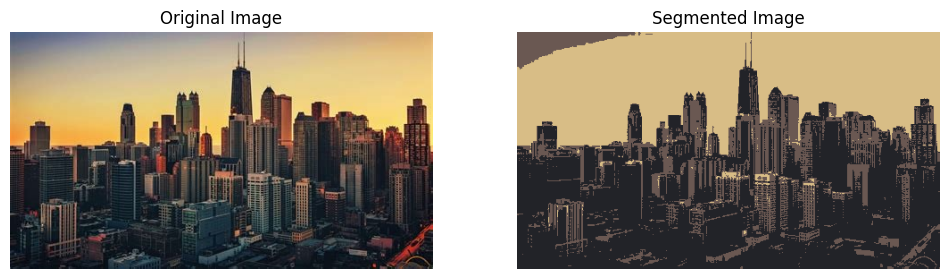

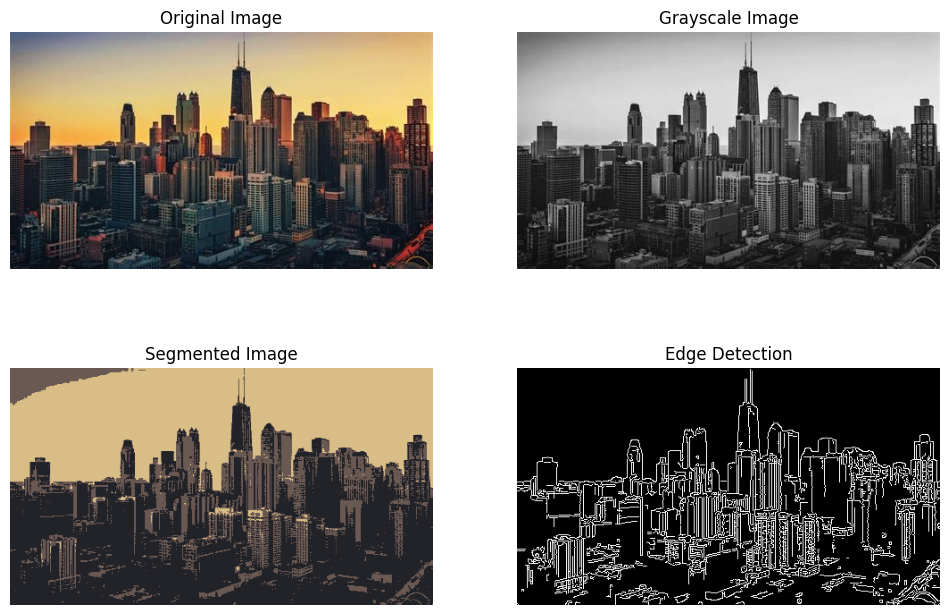

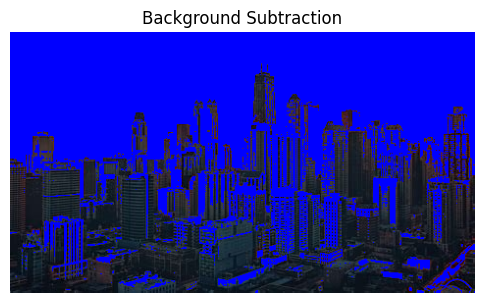

In [2]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files

# Upload the image
uploaded = files.upload()

# Get the image path
image_path = list(uploaded.keys())[0]

# Load the image
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Image not loaded. Check the file path or upload.")

# Convert the image to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixels = image.reshape(-1, 3)

# Number of clusters (K)
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)  # Added random_state for reproducibility
kmeans.fit(pixels)
labels = kmeans.predict(pixels)
segmented_image = kmeans.cluster_centers_[labels]

# Reshape back to the original image shape
segmented_image = segmented_image.reshape(image.shape)
segmented_image = segmented_image.astype(np.uint8)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')
plt.show()

# Grayscale conversion, edge detection, and background subtraction
# Convert to grayscale
gray_image = cv2.cvtColor(cv2.cvtColor(image, cv2.COLOR_RGB2BGR), cv2.COLOR_BGR2GRAY)

# Short boundary detection
edges = cv2.Canny(gray_image, 100, 200)

# Background subtraction (Blue background, Greenery foreground)
blue_background = np.zeros_like(image)
blue_background[:] = [0, 0, 255]  # Blue color
foreground_mask = (labels == np.argmin(np.sum(kmeans.cluster_centers_ - [34, 139, 34], axis=1))).reshape(image.shape[:2])
result_image = np.where(foreground_mask[..., None], image, blue_background)

# Display the results
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

# Grayscale image
plt.subplot(2, 2, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Segmented image
plt.subplot(2, 2, 3)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')

# Edge detection
plt.subplot(2, 2, 4)
plt.title('Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()

# Display the background subtraction result
plt.figure(figsize=(6, 6))
plt.title('Background Subtraction')
plt.imshow(result_image)
plt.axis('off')
plt.show()